In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Melakukan Data Cleaning
from sklearn.impute import SimpleImputer

#Melakukan Classifikasi KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Melakukan Classifikasi NAIVE BAYES
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [4]:
dataset_ns = df.copy()

In [5]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

In [6]:
#MODUS
dataset_ns['engine_capacity'] = imputer_modus.fit_transform(dataset_ns[['engine_capacity']])
dataset_ns.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [7]:
#MEAN
dataset_ns['duration_listed'] = imputer_mean.fit_transform(dataset_ns[['duration_listed']])

dataset_ns.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [8]:
dataset_ns.dropna(inplace=True)

dataset_ns.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [9]:
#DATA DUPLICATE
dataset_duplicate = df.copy()

dataset_duplicate.duplicated().sum()

40

In [10]:
dataset_duplicate.drop_duplicates(inplace=True)

dataset_duplicate.duplicated().sum()

0

In [11]:
#K-MEANS
dataset_ns.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16.0
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83.0
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151.0
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86.0
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7.0


In [12]:
dataset_ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38531 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [13]:
model = KMeans(n_clusters=4)

In [15]:
point = dataset_ns[['engine_capacity','duration_listed']]

In [16]:
model.fit(point)

KMeans(n_clusters=4)

In [17]:
label = model.labels_

In [18]:
label

array([0, 0, 1, ..., 3, 3, 3], dtype=int32)

In [19]:
X = point['engine_capacity']
Y = point['duration_listed']

In [20]:
centroid = model.cluster_centers_

In [21]:
centroid

array([[   2.03023729,   45.11411765],
       [   2.12799886,  166.74425902],
       [   2.33269231, 1401.20192308],
       [   2.32794118,  501.79044118]])

In [25]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

In [26]:
predicted_value = classifier.predict(x_test)
accuracy = accuracy_score(y_test, predicted_value)

NameError: ignored

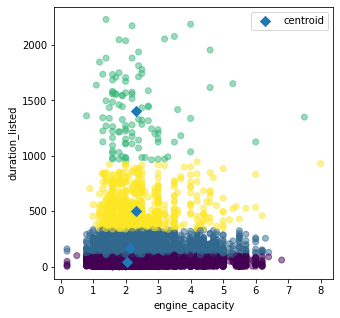

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(X, Y, alpha=0.5, c=label)
plt.scatter(centroid_X, centroid_Y, marker='D', s=50, label='centroid')
plt.xlabel('engine_capacity')
plt.ylabel('duration_listed')
plt.legend()
plt.show()

In [28]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)

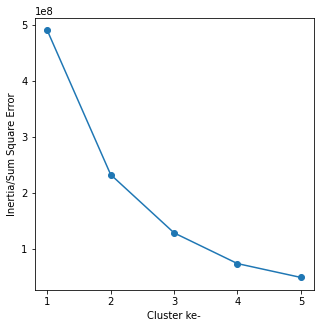

In [29]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('Inertia/Sum Square Error')
plt.xticks(cluster_range)
plt.show()